<a href="https://colab.research.google.com/github/get2aakash/DSMLprojects/blob/main/IPL_Player_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/deliveries.csv")
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


Indepth analysis of David Warner

In [3]:
filt = df['batsman']=="DA Warner"

In [5]:
df_warner = df[filt]

In [6]:
df_warner.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
df_warner.shape

(2902, 21)

In [10]:
#dismisal
df_warner['dismissal_kind'].value_counts()

caught               62
bowled               21
run out               8
lbw                   4
stumped               4
caught and bowled     2
hit wicket            1
Name: dismissal_kind, dtype: int64

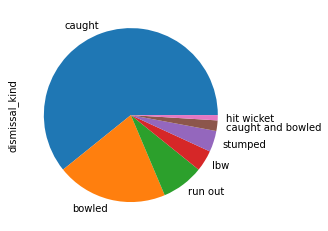

In [12]:
df_warner['dismissal_kind'].value_counts().plot.pie()

In [19]:
#number of 4s
len(df_warner[df_warner['batsman_runs']==4])

401

In [20]:
#number of 6s
len(df_warner[df_warner['batsman_runs']==6])

160

In [21]:
#Count total runs by type

def count(df,runs):
  return len(df_warner[df_warner['batsman_runs']==runs])*runs

In [22]:
count(df_warner,1)

997

In [23]:
count(df_warner,2)

414

In [24]:
count(df_warner,3)

39

In [25]:
count(df_warner,4)

1604

In [26]:
count(df_warner,5)

0

In [27]:
count(df_warner,6)

960

In [41]:
run = [1,2,3,4,5,6]
total_run = []
for i in run :
  total_run.append(count(df_warner,i))

In [42]:
total_run

[997, 414, 39, 1604, 0, 960]

([<matplotlib.patches.Wedge at 0x7f9e6dda4610>,
 [Text(0.7817643705069365, 0.7738504177203069, '1'),
  Text(-0.33959111687520577, 1.0462685474291247, '2'),
  Text(-0.6816960876596443, 0.863302058418451, '3'),
  Text(-1.0200956448131961, -0.4115882352948756, '4'),
  Text(0.0748425710656218, -1.0974509508658177, '5'),
  Text(0.8038429148449225, -0.750890516822272, '6')])

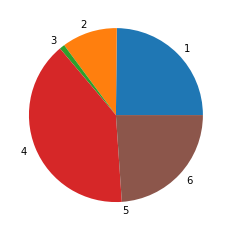

In [50]:
plt.pie(total_run,labels=run)

#Analysis on Batsman performance

In [51]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [52]:
df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

In [54]:
#Create abbreviation for team name for easy data manipulation
Teams = {
       'Royal Challengers Bangalore':'RCB',
       'Sunrisers Hyderabad':'SH',
       'Rising Pune Supergiant':'RPS',
       'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR',
       'Gujarat Lions':'GL',
       'Kings XI Punjab':'KXP',
       'Delhi Daredevils':'DD',
       'Chennai Super Kings':'CSK',
       'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC', 
       'Kochi Tuskers Kerala':'KTK',
       'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS'
    
}

In [55]:
Teams

{'Chennai Super Kings': 'CSK',
 'Deccan Chargers': 'DC',
 'Delhi Daredevils': 'DD',
 'Gujarat Lions': 'GL',
 'Kings XI Punjab': 'KXP',
 'Kochi Tuskers Kerala': 'KTK',
 'Kolkata Knight Riders': 'KKR',
 'Mumbai Indians': 'MI',
 'Pune Warriors': 'PW',
 'Rajasthan Royals': 'RR',
 'Rising Pune Supergiant': 'RPS',
 'Rising Pune Supergiants': 'RPS',
 'Royal Challengers Bangalore': 'RCB',
 'Sunrisers Hyderabad': 'SH'}

In [56]:
df['batting_team']=df['batting_team'].map(Teams)
df['bowling_team']=df['bowling_team'].map(Teams)

In [57]:
df['batting_team'].unique()

array(['SH', 'RCB', 'MI', 'RPS', 'GL', 'KKR', 'KXP', 'DD', 'CSK', 'RR',
       'DC', 'KTK', 'PW'], dtype=object)

In [58]:
df['bowling_team'].unique()

array(['RCB', 'SH', 'RPS', 'MI', 'KKR', 'GL', 'KXP', 'DD', 'CSK', 'RR',
       'DC', 'KTK', 'PW'], dtype=object)

#Score distribution for teams by innings

In [63]:
df.groupby(['match_id','inning','batting_team'])['total_runs'].sum()

match_id  inning  batting_team
1         1       SH              207
          2       RCB             172
2         1       MI              184
          2       RPS             187
3         1       GL              183
                                 ... 
634       2       KKR             140
635       1       GL              162
          2       SH              163
636       1       SH              208
          2       RCB             200
Name: total_runs, Length: 1284, dtype: int64

In [65]:
runs = df.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index() #Reset the index of the DataFrame, and use the default one instead. If the DataFrame has a MultiIndex, this method can remove one or more levels.
runs.drop('match_id',axis=1)

,inning,batting_team,total_runs
0,1,SH,207
1,2,RCB,172
2,1,MI,184
3,2,RPS,187
4,1,GL,183
...,...,...,...
1279,2,KKR,140
1280,1,GL,162
1281,2,SH,163
1282,1,SH,208


In [70]:
innings1 = runs[runs['inning']==1]
innings2 = runs[runs['inning']==2]

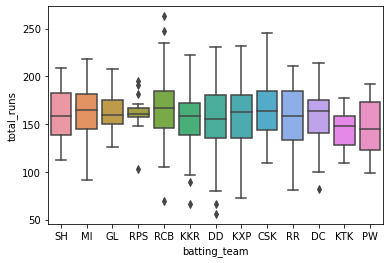

In [71]:
sns.boxplot(x='batting_team',y='total_runs',data=innings1)

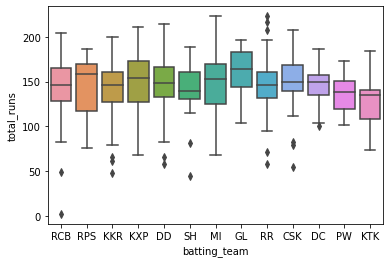

In [72]:
sns.boxplot(x='batting_team',y='total_runs',data=innings2)

In [73]:
high_score = df.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index() #Reset the index of the DataFrame, and use the default one instead. If the DataFrame has a MultiIndex, this method can remove one or more levels.


In [74]:
high_score

,match_id,inning,batting_team,total_runs
0,1,1,SH,207
1,1,2,RCB,172
2,2,1,MI,184
3,2,2,RPS,187
4,3,1,GL,183
...,...,...,...,...
1279,634,2,KKR,140
1280,635,1,GL,162
1281,635,2,SH,163
1282,636,1,SH,208


In [76]:
score_200 = high_score[high_score['total_runs']>=200]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


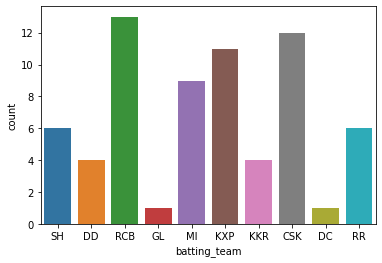

In [78]:
sns.countplot(score_200['batting_team'])

#Top 10 batsmen

In [80]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [99]:
run_by_batsman = df.groupby(['batsman'])['total_runs'].sum().reset_index()
run_by_batsman.sort_index()

,batsman,total_runs
0,A Ashish Reddy,288
1,A Chandila,4
2,A Chopra,58
3,A Choudhary,25
4,A Flintoff,72
...,...,...
456,YV Takawale,207
457,Yashpal Singh,49
458,Younis Khan,3
459,Yuvraj Singh,2710


In [100]:
run_by_batsman['total_runs']

,batsman,total_runs
0,A Ashish Reddy,288
1,A Chandila,4
2,A Chopra,58
3,A Choudhary,25
4,A Flintoff,72
...,...,...
456,YV Takawale,207
457,Yashpal Singh,49
458,Younis Khan,3
459,Yuvraj Singh,2710


In [102]:
top10runmaker = run_by_batsman.nlargest(10,'total_runs')

In [103]:
top10runmaker

,batsman,total_runs
374,SK Raina,4745
431,V Kohli,4588
137,G Gambhir,4388
323,RG Sharma,4334
103,DA Warner,4213
340,RV Uthappa,4004
85,CH Gayle,3914
347,S Dhawan,3754
259,MS Dhoni,3728
22,AB de Villiers,3621


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

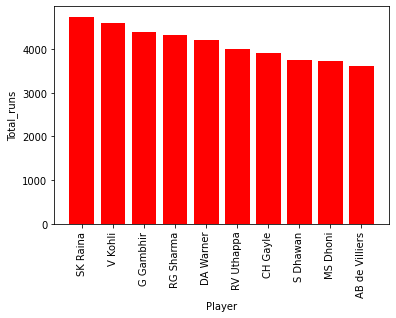

In [121]:
x = top10runmaker['batsman']
y = top10runmaker['total_runs']
plt.bar(x,y,color='r')
plt.xlabel('Player')
plt.ylabel('Total_runs')
plt.xticks(rotation=90)

#Top indiviual scorer batsman

In [123]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [129]:
top10score=df.groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index()
top10score

,match_id,batsman,batsman_runs
0,1,A Choudhary,6
1,1,BCJ Cutting,16
2,1,CH Gayle,32
3,1,DA Warner,14
4,1,DJ Hooda,16
...,...,...,...
9510,636,SR Watson,11
9511,636,STR Binny,9
9512,636,Sachin Baby,18
9513,636,V Kohli,54


In [131]:
top10score_ = top10score.nlargest(10,'batsman_runs')
top10score_

,match_id,batsman,batsman_runs
6200,411,CH Gayle,175
900,60,BB McCullum,158
8426,562,AB de Villiers,133
9257,620,AB de Villiers,129
5585,372,CH Gayle,128
3135,206,M Vijay,127
529,36,DA Warner,126
7752,516,V Sehwag,122
3686,243,PC Valthaty,120
4223,279,V Sehwag,119


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

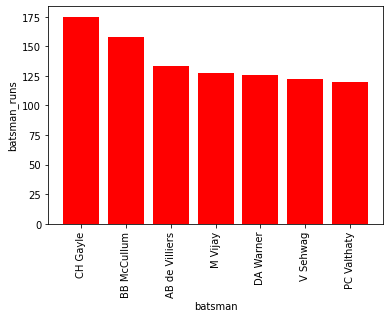

In [135]:
x = top10score_['batsman']
y = top10score_['batsman_runs']
plt.bar(x,y,color='r')
plt.xlabel('batsman')
plt.ylabel('batsman_runs')
plt.xticks(rotation=90)

#Highest Wicket Tracker

In [137]:
df.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
150455,636,2,RCB,SH,20,2,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,RCB,SH,20,3,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,RCB,SH,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,RCB,SH,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
150459,636,2,RCB,SH,20,6,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


In [138]:
df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [145]:
dismissal_kinds=['caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field']

In [147]:
hwt=df[df['dismissal_kind'].isin(dismissal_kinds)] #removing nan values
hwt.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,SH,RCB,2,5,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,SH,RCB,11,3,S Dhawan,MC Henriques,STR Binny,0,0,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,SH,RCB,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,SH,RCB,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,0,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,RCB,SH,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,0,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN


In [153]:
hwt['bowler'].value_counts()

SL Malinga          170
A Mishra            142
DJ Bravo            137
Harbhajan Singh     136
PP Chawla           133
                   ... 
Avesh Khan            1
B Laughlin            1
Mashrafe Mortaza      1
PM Sarvesh Kumar      1
AJ Finch              1
Name: bowler, Length: 314, dtype: int64

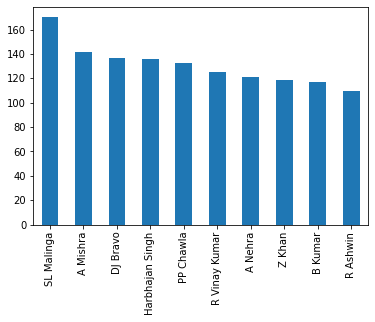

In [156]:
hwt['bowler'].value_counts()[:10].plot(kind='bar')